In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
import requests
url='https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv'
r=requests.get(url,allow_redirects=True)


from io import StringIO
data=StringIO(r.text)

df=pd.read_csv(data)

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df['targets']=df['labels'].astype('category').cat.codes


In [6]:
K=df['targets'].max()+1
K

5

In [7]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [8]:
MAX_VOCAB_SIZE=2000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train=tokenizer.texts_to_sequences(df_train['text'])
sequences_test=tokenizer.texts_to_sequences(df_test['text'])

In [9]:
word2idx=tokenizer.word_index
V=len(word2idx)
print('found %s unique tokens' %V)

found 27654 unique tokens


In [10]:
data_train=pad_sequences(sequences_train)
print('shape of data train tensor ',data_train.shape)

shape of data train tensor  (1557, 3485)


In [11]:
T=data_train.shape[1]

In [12]:
data_test=pad_sequences(sequences_test,maxlen=T)
print('shape of data test tensor',data_test.shape)

shape of data test tensor (668, 3485)


In [13]:
D=50
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(K)(x)

model=Model(i,x)

In [14]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',metrics=['accuracy']
)

print('training model....')

r=model.fit(data_train,df_train['targets'],epochs=50,validation_data=(data_test,df_test['targets']))

training model....
Epoch 1/50
49/49 [==============================] - 14s 235ms/step - loss: 1.5706 - accuracy: 0.3976 - val_loss: 1.4941 - val_accuracy: 0.5704
Epoch 2/50
49/49 [==============================] - 12s 248ms/step - loss: 1.3506 - accuracy: 0.6789 - val_loss: 1.2004 - val_accuracy: 0.7665
Epoch 3/50
49/49 [==============================] - 12s 253ms/step - loss: 0.9404 - accuracy: 0.8741 - val_loss: 0.7647 - val_accuracy: 0.8787
Epoch 4/50
49/49 [==============================] - 14s 276ms/step - loss: 0.5177 - accuracy: 0.9268 - val_loss: 0.4538 - val_accuracy: 0.9027
Epoch 5/50
49/49 [==============================] - 16s 324ms/step - loss: 0.2849 - accuracy: 0.9512 - val_loss: 0.3179 - val_accuracy: 0.9207
Epoch 6/50
49/49 [==============================] - 15s 296ms/step - loss: 0.1780 - accuracy: 0.9672 - val_loss: 0.2580 - val_accuracy: 0.9311
Epoch 7/50
49/49 [==============================] - 14s 285ms/step - loss: 0.1196 - accuracy: 0.9814 - val_loss: 0.2285 - v

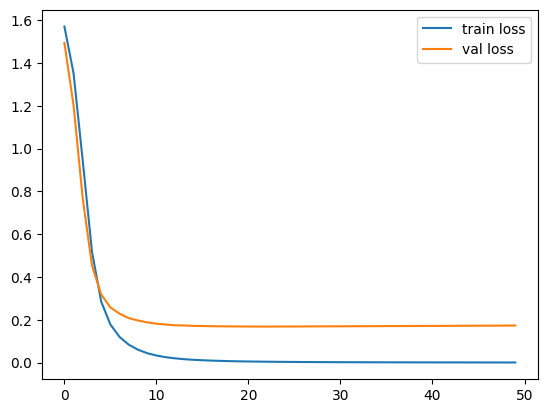

In [15]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()

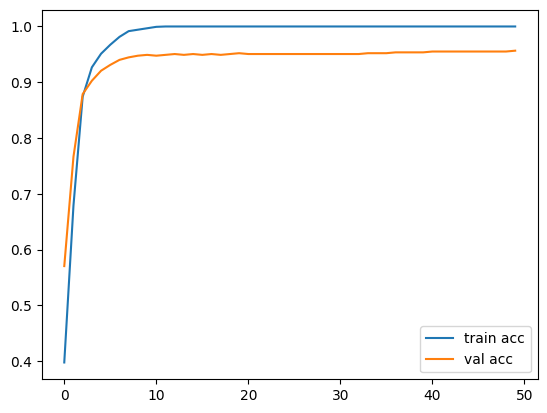

In [16]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()